In [2]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Configuración de parámetros
img_size = (224, 224)
batch_size = 32
epochs = 30
learning_rate = 1e-4  # Ajusta según sea necesario

# Cargar el modelo DenseNet121 preentrenado en ImageNet
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Congelar las capas base
for layer in base_model.layers:
    layer.trainable = False

# Añadir capas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduce la dimensión espacial
x = Dropout(0.5)(x)  # Regularización
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)  # Cambia el número de clases según tu conjunto de datos

# Construir el modelo completo
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Configuración del generador de datos para entrenamiento y validación
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,  # Mayor rotación para aumento de datos
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = 'C:/Users/yeiko/Capstone/Dataset/train'
val_dir = 'C:/Users/yeiko/Capstone/Dataset/valid'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs
)

# Guardar el modelo entrenado
model.save('C:/Users/yeiko/Capstone/Modelos/modelo_densenet121.h5')


Found 2724 images belonging to 3 classes.
Found 289 images belonging to 3 classes.
Epoch 1/30


C:\Users\yeiko\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


85/85 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.3757 - loss: 1.8329 - val_accuracy: 0.6319 - val_loss: 0.8411
Epoch 2/30
 1/85 ━━━━━━━━━━━━━━━━━━━━ 1:51 1s/step - accuracy: 0.5938 - loss: 1.1591

C:\Users\yeiko\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5938 - loss: 1.1591 - val_accuracy: 1.0000 - val_loss: 0.3167
Epoch 3/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.4671 - loss: 1.2774 - val_accuracy: 0.7049 - val_loss: 0.7171
Epoch 4/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5312 - loss: 1.0392 - val_accuracy: 0.0000e+00 - val_loss: 1.6716
Epoch 5/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.5304 - loss: 1.1016 - val_accuracy: 0.7326 - val_loss: 0.6827
Epoch 6/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5312 - loss: 1.2425 - val_accuracy: 1.0000 - val_loss: 0.1502
Epoch 7/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.5679 - loss: 0.9847 - val_accuracy: 0.7535 - val_loss: 0.6737
Epoch 8/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6562 - loss: 0.7708 - val_accuracy: 1.0000 - val_loss: 0.1868
Epoch 9/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.5927 - loss: 0.9125 - val_accuracy: 0.7396 - val_loss: 0.

Found 141 images belonging to 3 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9591 - loss: 0.1235
Precisión en el conjunto de prueba: 0.96
Pérdida en el conjunto de prueba: 0.11


4/5 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002907F6611C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step
Reporte de Clasificación:
              precision    recall  f1-score   support

      Bengin       0.97      0.90      0.93        39
   Malignant       1.00      1.00      1.00        72
      Normal       0.88      0.97      0.92        30

    accuracy                           0.96       141
   macro avg       0.95      0.95      0.95       141
weighted avg       0.97      0.96      0.96       141



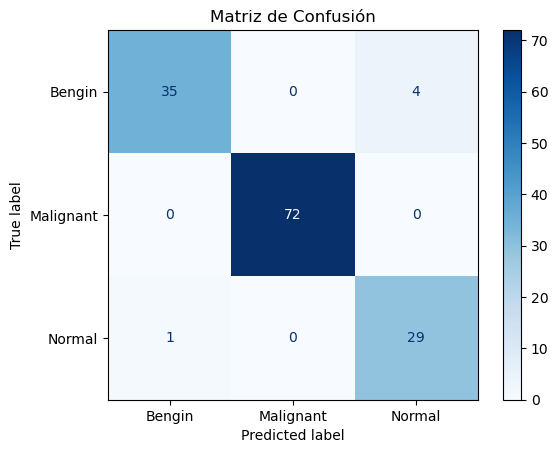

In [7]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Configuración de parámetros
img_size = (224, 224)
batch_size = 32

# Cargar el modelo entrenado
model_path = 'C:/Users/yeiko/Capstone/Modelos/modelo_densenet121_v3.h5'
model = load_model(model_path)

# Configuración del generador de datos para el conjunto de prueba
test_dir = 'C:/Users/yeiko/Capstone/Dataset/test'
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")
print(f"Pérdida en el conjunto de prueba: {test_loss:.2f}")

# Obtener predicciones
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys(), zero_division=1))

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()


In [6]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Configuración de parámetros
img_size = (224, 224)
batch_size = 32
retrain_epochs = 100  # Ajusta según sea necesario
learning_rate = 1e-5

# Cargar el modelo previamente entrenado
model_path = 'C:/Users/yeiko/Capstone/Modelos/modelo_densenet121_v2.h5'
model = load_model(model_path)

# Descongelar las últimas capas del modelo base
for layer in model.layers[-30:]:  # Ajusta según el número de capas que quieras descongelar
    layer.trainable = True

# Compilar el modelo con una nueva tasa de aprendizaje
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Configuración del generador de datos para entrenamiento y validación
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = 'C:/Users/yeiko/Capstone/Dataset/train'
val_dir = 'C:/Users/yeiko/Capstone/Dataset/valid'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Calcular pesos de clase para manejar datos desbalanceados
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

# Reentrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=retrain_epochs,
    class_weight=class_weights_dict  # Aplicar pesos de clase
)

# Guardar el modelo reentrenado
model.save('C:/Users/yeiko/Capstone/Modelos/modelo_densenet121_v3.h5')


Found 2724 images belonging to 3 classes.
Found 289 images belonging to 3 classes.
Epoch 1/100


C:\Users\yeiko\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


85/85 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.8550 - loss: 0.3739 - val_accuracy: 0.8889 - val_loss: 0.2538
Epoch 2/100
 1/85 ━━━━━━━━━━━━━━━━━━━━ 1:57 1s/step - accuracy: 0.8438 - loss: 0.4402

C:\Users\yeiko\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8438 - loss: 0.4402 - val_accuracy: 0.0000e+00 - val_loss: 1.2064
Epoch 3/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.8625 - loss: 0.3600 - val_accuracy: 0.8819 - val_loss: 0.2526
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8750 - loss: 0.3769 - val_accuracy: 1.0000 - val_loss: 0.0095
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.8585 - loss: 0.3778 - val_accuracy: 0.8889 - val_loss: 0.2535
Epoch 6/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9062 - loss: 0.2280 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 7/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.8523 - loss: 0.3764 - val_accuracy: 0.8889 - val_loss: 0.2477
Epoch 8/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9688 - loss: 0.1914 - val_accuracy: 1.0000 - val_loss: 0.4813
Epoch 9/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.8565 - loss: 0.3564 - val_accuracy: 0.8958 - val_l

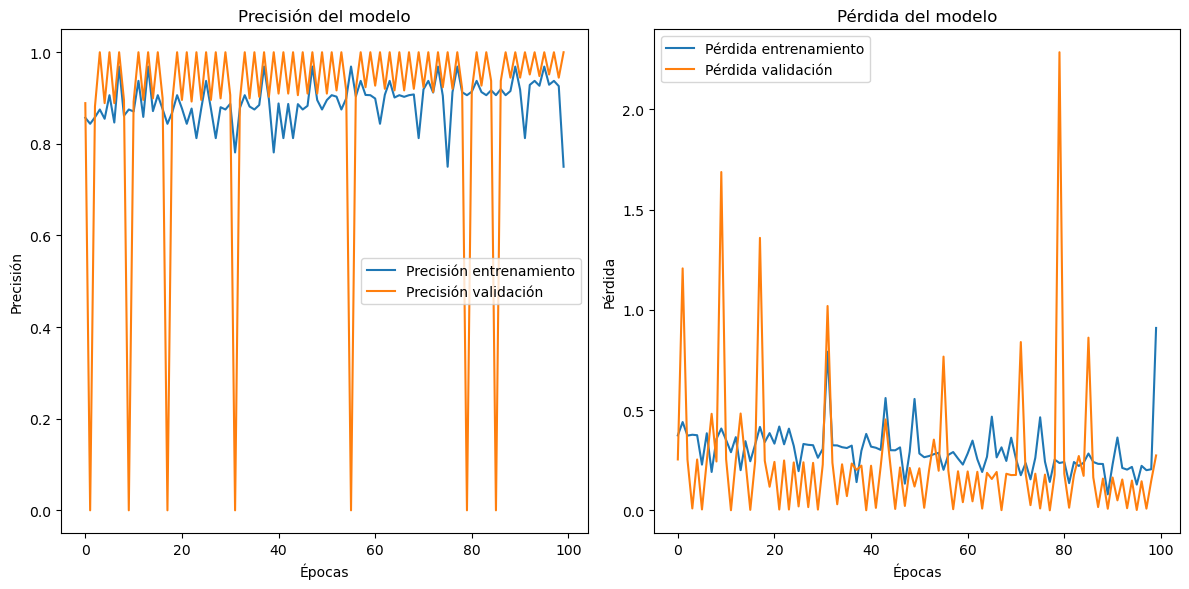

In [8]:
import matplotlib.pyplot as plt

# Suponiendo que `history` es el historial del entrenamiento del modelo
# Si ya tienes el historial, puedes cargarlo directamente o usar la variable `history`
# Ejemplo: history = model.fit(...)

# Graficar precisión
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subgráfico para la precisión
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar pérdida
plt.subplot(1, 2, 2)  # Subgráfico para la pérdida
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()
